# Python for Psychologists - Session 14

## Recap: Visualisation & dataframe handling

The Titanic dataset

Today we will explore the Titanic dataset.

You can find the Titanic dataset and a corresponding tutorial challenge on Kaggle at https://www.kaggle.com/c/titanic 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline

We can use seaborns `load_dataset` function to load the titanic dataset, or we could get it from kaggle. The `load_dataset()` function fetches datasets available at https://github.com/mwaskom/seaborn-data.  

Variables:

    Survived: Survived (1) or died (0)
    Pclass: Passenger's class
    Name: Passenger's name
    Sex: Passenger's sex
    Age: Passenger's age
    SibSp: Number of siblings/spouses aboard
    Parch: Number of parents/children aboard
    Ticket: Ticket number
    Fare: Fare
    Cabin: Cabin
    Embarked: Port of embarkation


#### 1) Load the dataset "titanic" using the seaborn `load_dataset()` function.

In [2]:
titanic = sns.load_dataset("titanic") 
titanic.head(15)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


#### 2) Inspect the dataframe (i.e., descriptive statistics) and check for missing values 

In [20]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### 3) There are two columns with only two missing values, try to drop these rows in one line of code using `dataframe.dropna(subset=...)`.

In [22]:
titanic = titanic.dropna(subset=["embarked", "embark_town"])

#### 4) The variable "embarked" contains ["S","C","Q"], try to convert these strings to integers using `dataframe[].replace`  (note: this does not happen in place, but returns the respective transformed Series) together with a dictionary that encodes C:0, Q:1, S:2.

In [25]:
titanic["embarked"]

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 889, dtype: object

In [26]:
titanic["embarked"] = titanic["embarked"].replace({'C': 0, 'Q': 1, 'S': 2})

#### 5) Try to print the "female and male only count" below, i.e., you need to select a subset of the dataframe that only shows female or male passengers and count these respectively by using `.count()`

In [178]:
print("\n Female only count")
print(titanic.loc[titanic["sex"] == "female"].count())

print("\n Male only count")
print(titanic.loc[titanic["sex"] == "male"].count())


 Female only count
survived       312
pclass         312
sex            312
age            259
sibsp          312
parch          312
fare           312
embarked       312
class          312
who            312
adult_male     312
deck            95
embark_town    312
alive          312
alone          312
dtype: int64

 Male only count
survived       577
pclass         577
sex            577
age            453
sibsp          577
parch          577
fare           577
embarked       577
class          577
who            577
adult_male     577
deck           106
embark_town    577
alive          577
alone          577
dtype: int64


#### 6) Plot age for male and female passengers using seaborn´s boxplot

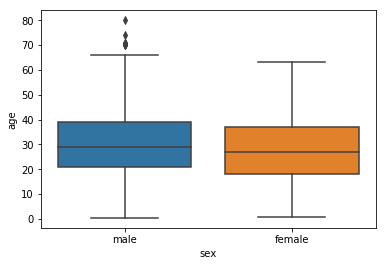

In [31]:
sns.boxplot(x='sex', y='age', data=titanic)

#### 7) Now try to get the mean age for female and male passengers in a single line of code (hint: you might need to group your dataframe in some way)

In [32]:
titanic.groupby("sex")["age"].mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

#### 8) Try to plot the age distribution using seaborns `distplot()`, but keep in mind that the variable age has a lot of missing values and plotting won´t work 

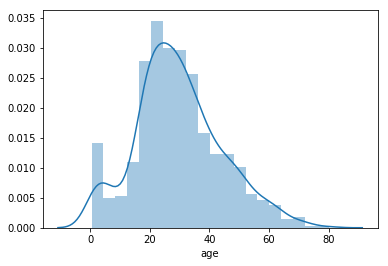

In [33]:
sns.distplot(titanic["age"].dropna())

#### 9)Try to use seaborns `countplot` to plot how many passengers survived color coded (i.e., the `hue=` parameter) by 1) class and 2) who 

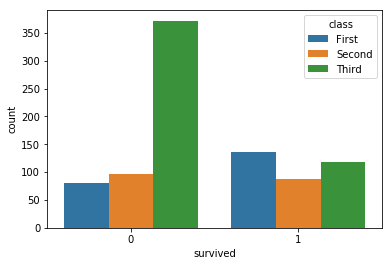

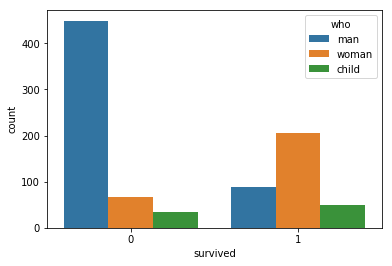

In [34]:
plt.figure()
sns.countplot(x='survived', hue='class', data=titanic)

plt.figure()
sns.countplot(x='survived', hue='who', data=titanic)

#### 10)This seems like third class passengers and men were not very lucky when the titanic crashed the floating berg.
#### Try to dissolve both plots depicted above using seaborns `pointplot()` to get a better picture.  

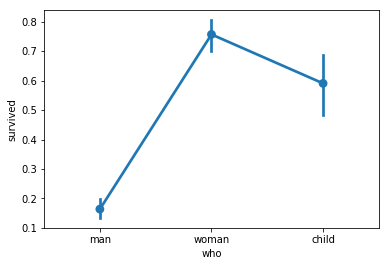

In [35]:
sns.pointplot(x="who", y = "survived", data = titanic)

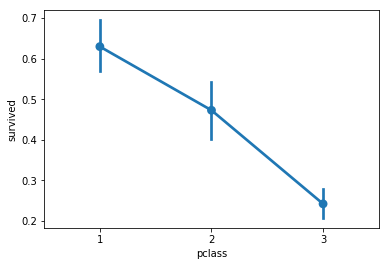

In [36]:
sns.pointplot(x="pclass", y = "survived", data = titanic)

#### 11) Create a new column ["fam_size"], that contains the family size of each passenger 

In [37]:
titanic["fam_size"] = titanic["sibsp"] + titanic["parch"] + 1 #calculate family size 

#### 12) How many percent of the passengers died/survived? (hint: you need to select subsets of the dataframe)

In [38]:
len(titanic.loc[titanic["survived"] == 1])/len(titanic["survived"])

0.3838383838383838

In [39]:
len(titanic.loc[titanic["survived"] == 0])/len(titanic["survived"])

0.6161616161616161

#### 13) How many female/male passengers died/survived?

In [97]:
len(titanic.loc[(titanic["survived"] == 0) & (titanic["sex"] =="female")]) / len(titanic.loc[titanic["sex"] =="female"])

0.25961538461538464

In [148]:
1 - len(titanic.loc[(titanic["survived"] == 0) & (titanic["sex"] =="female")]) / len(titanic.loc[titanic["sex"] =="female"])

0.7403846153846154

In [99]:
len(titanic.loc[(titanic["survived"] == 0) & (titanic["sex"] =="male")]) / len(titanic.loc[titanic["sex"] =="male"])

0.8110918544194108

In [149]:
1 - len(titanic.loc[(titanic["survived"] == 0) & (titanic["sex"] =="male")]) / len(titanic.loc[titanic["sex"] =="male"])

0.18890814558058922

#### 14) What´s the mean age of female and male survivors?

In [40]:
titanic.loc[titanic["survived"]==1].groupby("sex")["age"].mean()

sex
female    28.847716
male      27.276022
Name: age, dtype: float64

#### 15) Create two variables that contain only the age for female and male passengers and try to calculate a t-test using `stats.ttest_ind(....., nan_policy="omit")` 


For now we ingore the missing values and calculate the t-test for learning purposes only. 


A comprehensive overview on scipy stats can be found here: https://docs.scipy.org/doc/scipy/reference/stats.html

In [5]:
x = titanic.loc[titanic["sex"]=="female"]["age"]
y = titanic.loc[titanic["sex"]=="male"]["age"]

In [188]:
from scipy import stats

In [189]:
stats.ttest_ind(x,y, nan_policy="omit")

Ttest_indResult(statistic=-2.6519664212804797, pvalue=0.008181084109248551)

#### 16) Calculate a pearson correlation between age and fare and try to plot the association using `sns.jointplot(....., kind="reg")` afterwards

In [209]:
titanic.dropna(subset=["age"], inplace=True) # for now, we are dropping all rows that does not contain age values 

In [210]:
stats.pearsonr(titanic["age"], titanic["fare"])

(0.09314251789411519, 0.012904553407042496)

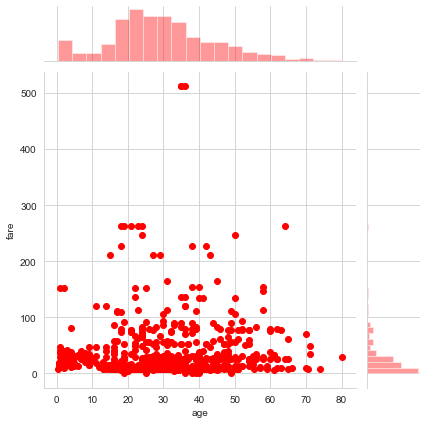

In [7]:
sns.set_style("whitegrid")
sns.jointplot("age", "fare", data=titanic, kind="scatter", color= "r" )